In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet
from common.trainer import Trainer
import pickle

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = 40000  # 40000장은 train 10000장은 test
batch_size = 400  
learning_rate = 0.01
RGB =3
PIxEL = 32
HIDDEN_SIZE =50
OUTPUT_SIZE = 10

title = 'CNN_ReLU__iters_num={}__batchSize_{}__learning_rate_{}__HIDDEN_SIZE ={}'.format(iters_num,batch_size,learning_rate,HIDDEN_SIZE)

pickle_name = "CIRFAR_10_CNN_32.pickle"
# 데이터 읽기 data = [50000, 2] one hot encoding 되어 있음 (data, label)
with open(pickle_name,"rb") as fr:
    data = pickle.load(fr)
# 무작위로 섞는 부분
data = pd.DataFrame(data)
data = data.sample(frac=1, replace=False)
# 다시 numpy 로 만들어준다.
data = data.to_numpy()
# label 과 data를 분리
label = [x[1] for x in data]
data = [x[0] for x in data]
# normalize 하는 부분
data = np.array(data, dtype='float64')
label = np.array(label)
x_train = data[:train_size]
t_train = label[:train_size]
x_test = data[train_size:]
t_test = label[train_size:]


(40000, 3, 32, 32)
(40000,)
(10000, 3, 32, 32)
(10000,)


train loss:2.2989430818558767
=== epoch:1, train acc:0.094, test acc:0.098 ===
train loss:2.300693144949424
train loss:2.299235620174359
train loss:2.2985830773900595
train loss:2.298997296909322
train loss:2.2920353470632633
train loss:2.299027371668609
train loss:2.3025793925211544
train loss:2.3032798774740213
train loss:2.2879179263405414
train loss:2.281832456317407
train loss:2.294991108396391
train loss:2.288685522771307
train loss:2.2978835067066354
train loss:2.2786171514723055
train loss:2.2869931685052247
train loss:2.2559049483942415
train loss:2.2531244107531325
train loss:2.2836251937902845
train loss:2.2387880446942416
train loss:2.250505281770559
train loss:2.277823533198191
train loss:2.2161759810913715
train loss:2.204072946455197
train loss:2.1975479152710222
train loss:2.212315835825299
train loss:2.1383976760463392
train loss:2.1680962130029973
train loss:2.2665664185625114
train loss:2.1804097928830104
train loss:2.1604351531022425
train loss:2.2016516101425907
tr

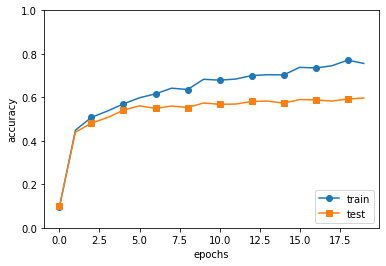

In [10]:

max_epochs = 20

network = SimpleConvNet(input_dim=(3,32,32), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)

# 피클로 저장
train_acc_list_title = 'train_acc_list' + title +'.pickle'
test_acc_list_title = 'test_acc_list' + title +'.pickle'
# save
with open(train_acc_list_title , 'wb') as fw:
    pickle.dump(trainer.train_acc_list, fw)
    

# save
with open(test_acc_list_title, 'wb') as fw:
    pickle.dump(trainer.test_acc_list, fw)
    
#ploting 하기
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()